<a href="https://colab.research.google.com/github/nelsongcn/Atividades-IGTI/blob/main/IGTI_M1_TP_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Aula prática de regressão linear. 
O objetivo é prever o custo da diária de um imóvel baseado ao número de pessoas



In [1]:
# importando as bibliotecas 
import pandas as pd # Trabalhar com tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos 
import seaborn as sns # biblioteca para gráficos 
import numpy as np #funções matemáticas de alto nível 




Abrindo o arquivo conténdo os dados utilizados na regressão



In [2]:
base_custo_diaria = pd.read_csv('custo_diaria.csv', sep= ';')

In [3]:
#visalizando arquivos da base de dados
base_custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549


In [4]:
# algumas estatisticas da base de dados 
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


Criando as variáveis que serão utilizadas no modelo

In [5]:
# Criando variável independente  
X_custo_diaria = base_custo_diaria.iloc[:,0].values #buscamos todos os registros da primeira coluna e convertemos no formato de array
# o comando iloc permite selecionar um conjunto de registros. o dois pontos ":" significa que estamos selecionando todos os regisros e zero "0" a primeira coluna
X_custo_diaria

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [6]:
#criando variável dependente (o que queremos predizer)
y_custo_diaria = base_custo_diaria.iloc[:,1].values
y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [7]:
np.corrcoef(X_custo_diaria,y_custo_diaria) # mostra uma matriz 

array([[1.        , 0.97866601],
       [0.97866601, 1.        ]])

# Correlação

Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;

Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.



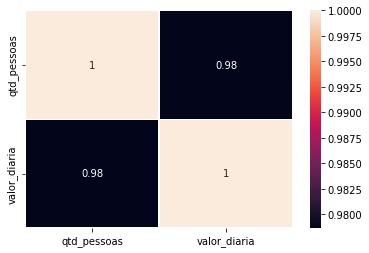

In [8]:
correlation = base_custo_diaria.corr()
# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True,  linewidths=.3)
plot

Perceba que temos uma correlçao forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diária também aumenta. 
Além disso, podemos dizer que em 99% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imóvel.


#Tratando os dados para o modelo
Nesse passo vamos realizar transformações nos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicitada como entrada. 

In [9]:
#vizualiar o formato da variável
X_custo_diaria.shape # 

(30,)

In [10]:
#visualizando variável
X_custo_diaria # o resultado mostra que temos uma array com apenas uma coluna/dimensão. NO entanto, precisamos ter uma matriz com 2 colunas

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [11]:
X_custo_diaria = X_custo_diaria.reshape(-1,1)
X_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [12]:
# Agora nós temos uma matriz com duas colunas. 10 linhas e uma coluna
X_custo_diaria.shape 

(30, 1)

# Aplicando os dados ao algoritmo de machine de regressão

In [13]:
from sklearn.linear_model import LinearRegression
# cria um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [14]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

# Realizando o Treinamento do modelo

In [15]:
previsao_custo_diaria.fit(X_custo_diaria, y_custo_diaria)

LinearRegression()

In [16]:
# Verfificando a interceptação  
previsao_custo_diaria.intercept_


186.00229281307384

In [17]:
#Verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([51.14094547])

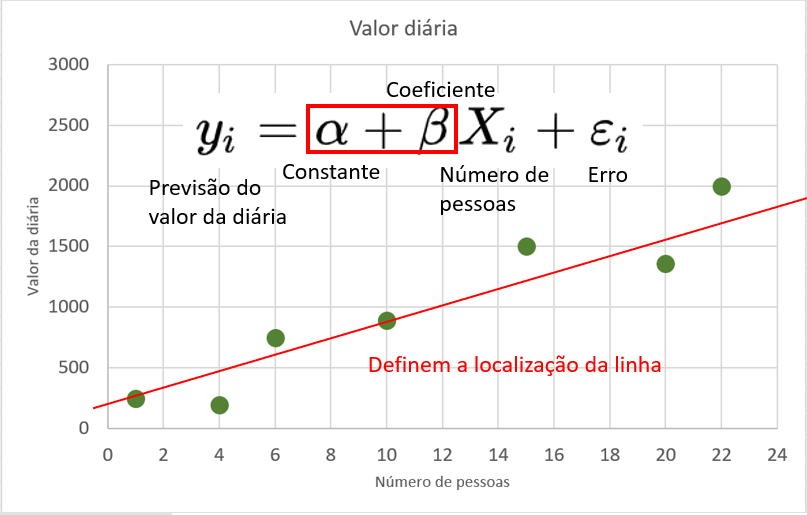

In [18]:
previsao_precos = previsao_custo_diaria.predict(X_custo_diaria)# baseado nos valores de nº de pessoas, vamos estimar/prever o custo do imóvel alugado

In [19]:
#visualiza das previsões para cada nª de pessoas
previsao_precos

array([ 237.14323829,  339.42512923,  390.5660747 ,  492.84796565,
        543.98891112,  697.41174754,  799.69363849,  850.83458396,
        953.1164749 , 1004.25742038, 1208.82120227, 1106.53931132,
       1311.10309321, 1362.24403869, 1464.52592963, 1566.80782058,
       1720.230657  , 1822.51254794, 1873.65349341, 2231.64011172,
       2333.92200267, 2385.06294814, 2487.34483909, 2589.62673003,
       2743.04956645, 2794.19051192, 2845.3314574 , 2896.47240287,
       3152.17713023, 3254.45902118])

# Visualizando no gráfico as disposições dos dados
Para visualizar os dados no grafico, temos que transformar os valores das variáveis para o formato de vetor. Para isso utilizamos o comando ravel()

In [20]:
# Verificando tipo da variável X_custo_diaria
X_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [21]:
X_custo_diaria.ravel() # transforma em um vetor

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [22]:
y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [23]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [24]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = X_custo_diaria.ravel(), y = previsao_precos, name= 'previsões')
grafico.show()

In [25]:
# Verificando os valores de um determinada previsão baseada na quantidade de pessoas 
qtd_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([390.5660747])

In [26]:
qtd_pessoas = 57
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([3101.03618476])

In [27]:
# Verificando de modo direto
previsao_custo_diaria.predict([[57]]) 

array([3101.03618476])

In [28]:
#indica a qualidade do algoritmo (Quanto mais próximo de 1, melhor a qualidade do modelo)
previsao_custo_diaria.score(X_custo_diaria, y_custo_diaria)

0.9577871649322629

In [29]:
# Visualizano os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria, previsao_precos)

In [30]:
MSE

36867.67840031127

In [31]:
#Calculando MAE 
mean_absolute_error(y_custo_diaria, previsao_precos)


138.91296481574125

In [32]:
# Calculando RMSE
np.sqrt(MSE)

192.0095789285297